<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/Prophet_maker_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.모듈 불러오기**








In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **2.data**


In [ ]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")
df = df.sort_values('date')
df['date']= pd.to_datetime(df['date'])

df = df.set_index('date')
df = df[df.index < '2019-04-01']
df = df.reset_index()
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
1,2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2,2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.97901,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
3,2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.98337,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
4,2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.99285,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2019-03-27,93.50,85.72,67.83,6336.00,59.41,59.12,37.47,690.0,1.40115,...,7194.200195,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000
3008,2019-03-28,92.95,85.64,67.82,6368.75,59.30,59.30,36.05,692.0,1.41153,...,7234.299805,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000
3009,2019-03-29,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609
3010,2019-03-30,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3012 non-null   datetime64[ns]
 1   Coal_price      3012 non-null   float64       
 2   iron            3012 non-null   float64       
 3   Brent_fut       3012 non-null   float64       
 4   copper_fut      3012 non-null   float64       
 5   WTI_fut         3012 non-null   float64       
 6   WTI             3012 non-null   float64       
 7   LNG_fut         3012 non-null   float64       
 8   bdi             3012 non-null   float64       
 9   USD/AUD(호주)     3012 non-null   float64       
 10  USD/CAD(캐나다)    3012 non-null   float64       
 11  USD/COP(콜롬비아)   3012 non-null   float64       
 12  US 달러지수         3012 non-null   float64       
 13  USD/IDR(인도네시아)  3012 non-null   float64       
 14  USD/RUB(러시아)    3012 non-null   float64       
 15  USD/

# **3.Prophet model**
  -Basic

In [ ]:
# def prophetm(df, z, x, y) :
  
#         #a = prophetm(z, x, y) 
#         df1 = df[['date', z]]
      
    
#         df1.columns = ['ds', 'y']
#         df1['ds']= pd.to_datetime(df1['ds'])
        
      
#         train = df1.drop(df.index[x:])
#         y_true = df1['y'][y:].values 
        
      
#         last_1year = pd.date_range('2019-01-01', periods=90)
#         last_1year = list(last_1year)
#         last_1year = pd.DataFrame(last_1year, columns = ['ds'])
#         last_1year['ds']= pd.to_datetime(last_1year['ds'])
#         m = Prophet(
#         # trend
#                 changepoint_prior_scale=0.05,
#         # seasonality
#                 weekly_seasonality=10,
#                 yearly_seasonality=20,
#               daily_seasonality=False,)
#         m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#         forecast = m.fit(train).predict(last_1year)
#         # fig = m.plot_components(forecast)
#         # a = add_changepoints_to_plot(fig.gca(), m, forecast)
#         y_pred = forecast['yhat'].values
       
#         return y_pred, last_1year['ds'], y_true
      
# # z = str(input('컬럼명 입력(''제외 입력): '))
# # x = int(input('삭제할 주 단위를 입력해주세요(-붙여서): '))
# # y = int(input('필요한 y값의 월 단위를 입력해주세요(-붙여서): '))




# # print('-------------done------------')
# # print('y_pred result: {} '  .format(y_pred))


In [ ]:
# # 함수에 적용과 데이터 프레임 만들어 값 넣어주기
# y_tt = prophetm(df, 'Coal_price', -12, -90)
# y_tt = pd.DataFrame(y_tt)
# y_tt = y_tt.T
# y_tr = y_tt[[1,2]]
# y_tr = y_tr.rename(columns ={2:'y_true',1:'ds'})
# y_tt = y_tt[[1,0]]
# y_tt = y_tt.rename(columns ={0:'y_pred',1:'ds'})
# # print(y_tt)
# # print(y_true)

# # 예측하고 비교하기
# # 여기에서는 MAE를 살펴본다.

# y_pred = y_tt['y_pred'].values
# y_true = y_tr['y_true'].values
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# mae = mean_absolute_error(y_true, y_pred)
# mape = mean_absolute_percentage_error(y_true, y_pred)

# print('MAE: %.3f' % mae)
# print('MAPE: %.3f' % mape)
# plt.plot(y_true, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.legend()
# plt.show()

#4.Prameter조정 prophet model

1.   Trend

*   **changepoints**	트렌드 변화시점을 명시한 리스트값
*  **changepoint_prior_scale**	changepoint(trend) 의 유연성 조절
*   **n_changepoints**	changepoint 의 개수
*   **changepoint_range**	changepoint 설정 가능 범위. (기본적으로 데이터 중 80% 범위 내에서 changepoint를 설정합니다.)


2.   **Seasonality**
*  **yearly_seasonality**	연 계절성
*  **weekly_seasonality**	주 계절성
*  **daily_seasonality**	일 계절성
*  **seasonality_prior_scale**	계절성 반영 강도
*  **seasonality_mode**	‘additive ‘ 인지 ‘multiplicative’ 인지


In [ ]:
# def prophetm1(df, z, x, y) :
  
#         #a = prophetm(z, x, y) 
#         df1 = df[['date', z]]
      
    
#         df1.columns = ['ds', 'y']
#         df1['ds']= pd.to_datetime(df1['ds'])
        
      
#         train = df1.drop(df.index[x:])
#         y_true = df1['y'][y:].values 
        
      
#         last_1year = pd.date_range('2019-01-01', periods=90)
#         last_1year = list(last_1year)
#         last_1year = pd.DataFrame(last_1year, columns = ['ds'])
#         last_1year['ds']= pd.to_datetime(last_1year['ds'])
#         m = Prophet(growth='linear', #linear -> 추세를 말함
#         # Trend
#         changepoints=None, # CP가 발생하는 시점들의 list ['2012-01-01']
#         n_changepoints=25, # CP의 수
#         changepoint_range=0.8, # CP의 기존 데이터 수 대비 최대 비율
#         changepoint_prior_scale=0.5, # CP 추정 민감도로 높을수록 민감
#         # Seasonality
#         seasonality_mode='additive', # 계절성 모델: 'additive' or 'multiplicative'
#         seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
#         yearly_seasonality= True, # 연계절성
#         weekly_seasonality='auto', # 주계절성
#         daily_seasonality='auto', #일계절성
#         # Holiday
#         holidays=None, # 휴일 또는 이벤트 시점 dataframe
#         holidays_prior_scale=10.0, # 휴일 추정 민감도로 높을수록 민감
#         # Others
#         interval_width=0.8, # 추세 예측 정확도 구간범위
#         mcmc_samples=0) # 계절성 예측 정확도 제어
#         forecast = m.fit(train).predict(last_1year)
#         # fig = m.plot_components(forecast)
#         # a = add_changepoints_to_plot(fig.gca(), m, forecast)
#         y_pred = forecast['yhat'].values
       
#         return y_pred, last_1year['ds'], y_true
      
# # z = str(input('컬럼명 입력(''제외 입력): '))
# # x = int(input('삭제할 주 단위를 입력해주세요(-붙여서): '))
# # y = int(input('필요한 y값의 월 단위를 입력해주세요(-붙여서): '))




# # print('-------------done------------')
# # print('y_pred result: {} '  .format(y_pred))




In [ ]:
# # 함수에 적용과 데이터 프레임 만들어 값 넣어주기
# y_tt = prophetm1(df, 'Coal_price', -12, -90)
# y_tt = pd.DataFrame(y_tt)
# y_tt = y_tt.T
# y_true = y_tt[[1,2]]
# y_true = y_true.rename(columns ={2:'y_true',1:'ds'})
# y_tt = y_tt[[1,0]]
# y_tt = y_tt.rename(columns ={0:'y_pred',1:'ds'})
# # print(y_tt)
# # print(y_true)

# # 예측하고 비교하기
# # 여기에서는 MAE를 살펴본다.

# y_pred = y_tt['y_pred'].values
# y_true = y_true['y_true'].values
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# mae = mean_absolute_error(y_true, y_pred)
# mape = mean_absolute_percentage_error(y_true, y_pred)

# print('MAE: %.3f' % mae)
# print('MAPE: %.3f' % mape)
# plt.plot(y_true, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.legend()
# plt.show()

##4.1 **Prophet model(all/3month)**
  -all 
  -3개월 prophet prediction


In [ ]:
def prophetm(df, i, x, y) :
  
        #a = prophetm(z, x, y) 
        df1 = df.iloc[:,[0, i]]
      
    
        df1.columns = ['ds', 'y']
        df1['ds']= pd.to_datetime(df1['ds'])
        
      
        train = df1.drop(df.index[x:])
        y_true = df1['y'][y:].values 
        # shellscript
      
        last_1year = pd.date_range('2019-01-01', periods=90)
        last_1year = list(last_1year)
        last_1year = pd.DataFrame(last_1year, columns = ['ds'])
        last_1year['ds']= pd.to_datetime(last_1year['ds'])
        m = Prophet(
        # trend
                changepoint_prior_scale=0.05,
        # seasonality
                weekly_seasonality=10,
                yearly_seasonality=20,
              daily_seasonality=False,)
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        forecast = m.fit(train).predict(last_1year)
        # fig = m.plot_components(forecast)
        # a = add_changepoints_to_plot(fig.gca(), m, forecast)
        y_pred = forecast['yhat'].values
       
        return y_pred, last_1year['ds']
      
# z = str(input('컬럼명 입력(''제외 입력): '))
# x = int(input('삭제할 주 단위를 입력해주세요(-붙여서): '))
# y = int(input('필요한 y값의 월 단위를 입력해주세요(-붙여서): '))




# print('-------------done------------')
# print('y_pred result: {} '  .format(y_pred))


In [ ]:
df.iloc[:,[0,30]]
# (2 - iron) 부터 (30 -캐나다 지수)까지 결과도출

,date,캐나다지수
0,2011-01-01,13443.200195
1,2011-01-02,13443.200195
2,2011-01-03,13443.200195
3,2011-01-04,13402.299805
4,2011-01-05,13396.000000
...,...,...
3007,2019-03-27,16132.500000
3008,2019-03-28,16155.500000
3009,2019-03-29,16102.099609
3010,2019-03-30,16102.099609


In [ ]:
y_tt = prophetm(df, 2 , -12, -90)
y_tt = pd.DataFrame(y_tt)
y_tt = y_tt.T
y_tt = y_tt.rename(columns ={0:2,1:'ds'})


In [ ]:
y_tt

,2,ds
0,74.522855,2019-01-01
1,74.9963,2019-01-02
2,75.284607,2019-01-03
3,75.557884,2019-01-04
4,75.76275,2019-01-05
...,...,...
85,76.092352,2019-03-27
86,75.990897,2019-03-28
87,76.026761,2019-03-29
88,76.046196,2019-03-30


In [ ]:
_ = y_tt.set_index('ds')

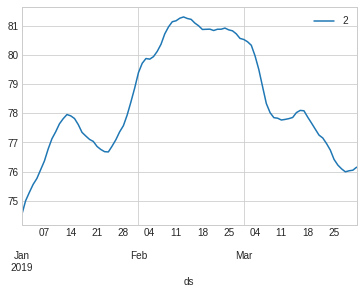

In [ ]:
_.plot()

In [ ]:
y_t = prophetm(df, 3 , -12, -90)
y_t = pd.DataFrame(y_t)
y_t = y_t.T
y_t = y_t.rename(columns ={0:3,1:'ds'})


In [ ]:
y_t

,3,ds
0,68.844687,2019-01-01
1,68.743551,2019-01-02
2,68.520474,2019-01-03
3,68.405736,2019-01-04
4,68.257358,2019-01-05
...,...,...
85,77.246685,2019-03-27
86,77.320475,2019-03-28
87,77.411569,2019-03-29
88,77.445115,2019-03-30


In [ ]:
y_x = pd.merge(y_t,y_tt, on='ds')
y_x

,3,ds,2
0,68.844687,2019-01-01,74.522855
1,68.743551,2019-01-02,74.9963
2,68.520474,2019-01-03,75.284607
3,68.405736,2019-01-04,75.557884
4,68.257358,2019-01-05,75.76275
...,...,...,...
85,77.246685,2019-03-27,76.092352
86,77.320475,2019-03-28,75.990897
87,77.411569,2019-03-29,76.026761
88,77.445115,2019-03-30,76.046196


In [ ]:
for i in range(4,31):
      y_tt = prophetm(df, i, -12, -90)
      y_tt = pd.DataFrame(y_tt)
      y_tt = y_tt.T
      y_tt = y_tt.rename(columns ={0:i,1:'ds'})
      
      y_x = pd.merge(y_x,y_tt, on='ds')


In [ ]:
y_x

,3,ds,2,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,68.844687,2019-01-01,74.522855,6338.449348,60.607189,60.575064,63.360254,1381.682968,1.406563,1.324021,...,7138.62284,11557.656351,2754.883974,27509.987943,7475.246958,2158.555002,22289.23744,3207.294033,5980.14784,15491.574898
1,68.743551,2019-01-02,74.9963,6328.466131,60.458968,60.424142,63.276945,1370.05157,1.405884,1.323644,...,7140.559256,11556.278493,2757.703402,27536.043607,7488.469204,2158.24392,22298.740508,3205.856078,5984.786085,15500.686341
2,68.520474,2019-01-03,75.284607,6323.487389,60.252915,60.242747,63.160457,1355.452987,1.406187,1.323195,...,7140.077111,11550.236164,2759.62566,27550.157941,7496.715561,2157.83506,22295.811253,3204.124995,5990.242953,15509.938682
3,68.405736,2019-01-04,75.557884,6324.902097,60.182117,60.174031,63.102454,1340.348076,1.406129,1.322845,...,7144.952006,11544.945422,2761.647753,27587.959076,7504.903712,2157.319356,22295.969776,3202.788429,5991.238556,15517.365113
4,68.257358,2019-01-05,75.76275,6320.396003,60.113034,60.11976,62.989985,1323.587394,1.405353,1.322406,...,7146.741329,11534.936465,2762.234293,27609.199789,7509.763807,2157.528226,22287.766273,3199.631211,5990.460013,15520.979191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,77.246685,2019-03-27,76.092352,6325.620254,68.426871,68.485469,63.369587,1211.817052,1.39006,1.335157,...,7153.932812,11528.228283,2832.532487,28179.249191,7795.52689,2182.875432,22296.531669,3231.922322,6100.631687,15800.551991
86,77.320475,2019-03-28,75.990897,6311.844867,68.4098,68.486532,63.269052,1209.393201,1.391191,1.335022,...,7145.704217,11525.264561,2832.704929,28150.134478,7793.601086,2182.614449,22289.778329,3230.620326,6105.548485,15789.144645
87,77.411569,2019-03-29,76.026761,6304.315683,68.458903,68.536581,63.153897,1204.943404,1.39267,1.334989,...,7143.024739,11524.243394,2833.576042,28140.108298,7793.013401,2180.801668,22283.090047,3229.846418,6107.050565,15776.609238
88,77.445115,2019-03-30,76.046196,6293.877013,68.516909,68.609469,62.94107,1197.049379,1.394044,1.334703,...,7140.09386,11521.665939,2833.871374,28121.665598,7791.23822,2178.555499,22270.834705,3227.945072,6108.224352,15765.899223


In [ ]:
df.columns

Index(['date', 'Coal_price', 'iron', 'Brent_fut', 'copper_fut', 'WTI_fut',
       'WTI', 'LNG_fut', 'bdi', 'USD/AUD(호주)', 'USD/CAD(캐나다)', 'USD/COP(콜롬비아)',
       'US 달러지수', 'USD/IDR(인도네시아)', 'USD/RUB(러시아)', 'USD/ZAR(자메이카)', '상하이종합지수',
       '인도지수', '브라질지수', '다우존스지수', '프랑스지수', '영국지수', '독일지수', 'S&P500지수', '항셍지수',
       '나스닥지수', '코스피지수', '니케이225지수', '유로스톡스50지수', '호주지수', '캐나다지수'],
      dtype='object')

In [ ]:
y_x.columns

Index([   3, 'ds',    2,    4,    5,    6,    7,    8,    9,   10,   11,   12,
         13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
         25,   26,   27,   28,   29,   30],
      dtype='object')

In [ ]:
y_x = y_x.rename(columns ={2:'iron',
                             3:'Brent_fut',
                             4:'copper_fut',
                             5:'WTI_fut',
                             6:'WTI',
                             7:'LNG_fut',
                             8:'bdi',
                             9:'USD/AUD(호주)',
                             10:'USD/CAD(캐나다)',
                             11:'USD/COP(콜롬비아)',
                             12:'US 달러지수',
                             13:'USD/IDR(인도네시아)',
                             14:'USD/RUB(러시아)',
                             15:'USD/ZAR(자메이카)',
                             16:'상하이종합지수',
                             17:'인도지수',
                             18:'브라질지수',
                             19:'다우존스지수',
                             20:'프랑스지수',
                             21:'영국지수',
                             22:'독일지수',
                             23:'S&P500지수',
                             24:'항셍지수',
                             25:'나스닥지수',
                             26:'코스피지수',
                             27:'니케이225지수',
                             28:'유로스톡스50지수',
                             29:'호주지수',
                             30:'캐나다지수'
                             })
                             

    

In [ ]:
y_x =y_x.set_index('ds')
y_x

,Brent_fut,iron,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),USD/CAD(캐나다),USD/COP(콜롬비아),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
ds,,,,,,,,,,,,,,,,,,,,,
2019-01-01,68.844687,74.522855,6338.449348,60.607189,60.575064,63.360254,1381.682968,1.406563,1.324021,3129.678051,...,7138.62284,11557.656351,2754.883974,27509.987943,7475.246958,2158.555002,22289.23744,3207.294033,5980.14784,15491.574898
2019-01-02,68.743551,74.9963,6328.466131,60.458968,60.424142,63.276945,1370.05157,1.405884,1.323644,3137.685291,...,7140.559256,11556.278493,2757.703402,27536.043607,7488.469204,2158.24392,22298.740508,3205.856078,5984.786085,15500.686341
2019-01-03,68.520474,75.284607,6323.487389,60.252915,60.242747,63.160457,1355.452987,1.406187,1.323195,3123.340029,...,7140.077111,11550.236164,2759.62566,27550.157941,7496.715561,2157.83506,22295.811253,3204.124995,5990.242953,15509.938682
2019-01-04,68.405736,75.557884,6324.902097,60.182117,60.174031,63.102454,1340.348076,1.406129,1.322845,3111.821637,...,7144.952006,11544.945422,2761.647753,27587.959076,7504.903712,2157.319356,22295.969776,3202.788429,5991.238556,15517.365113
2019-01-05,68.257358,75.76275,6320.396003,60.113034,60.11976,62.989985,1323.587394,1.405353,1.322406,3097.753456,...,7146.741329,11534.936465,2762.234293,27609.199789,7509.763807,2157.528226,22287.766273,3199.631211,5990.460013,15520.979191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-27,77.246685,76.092352,6325.620254,68.426871,68.485469,63.369587,1211.817052,1.39006,1.335157,3023.911007,...,7153.932812,11528.228283,2832.532487,28179.249191,7795.52689,2182.875432,22296.531669,3231.922322,6100.631687,15800.551991
2019-03-28,77.320475,75.990897,6311.844867,68.4098,68.486532,63.269052,1209.393201,1.391191,1.335022,3016.211128,...,7145.704217,11525.264561,2832.704929,28150.134478,7793.601086,2182.614449,22289.778329,3230.620326,6105.548485,15789.144645
2019-03-29,77.411569,76.026761,6304.315683,68.458903,68.536581,63.153897,1204.943404,1.39267,1.334989,3023.51394,...,7143.024739,11524.243394,2833.576042,28140.108298,7793.013401,2180.801668,22283.090047,3229.846418,6107.050565,15776.609238


In [ ]:
y_x.to_csv('/content/gdrive/My Drive/Black_coal/data/dataset/prophet_pred/prophet_pred_all.csv', index = True, encoding = 'utf-8-sig')

##4.2 **Prophet model(all/1year)**
  -all 
  -12개월 prophet prediction


In [ ]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")
df = df.sort_values('date')
df['date']= pd.to_datetime(df['date'])

df = df.set_index('date')
df = df[df.index < '2020-01-01']
df = df.reset_index()
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
1,2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2,2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.97901,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
3,2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.98337,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
4,2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.99285,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2019-03-27,93.50,85.72,67.83,6336.00,59.41,59.12,37.47,690.0,1.40115,...,7194.200195,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000
3008,2019-03-28,92.95,85.64,67.82,6368.75,59.30,59.30,36.05,692.0,1.41153,...,7234.299805,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000
3009,2019-03-29,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609
3010,2019-03-30,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3012 non-null   datetime64[ns]
 1   Coal_price      3012 non-null   float64       
 2   iron            3012 non-null   float64       
 3   Brent_fut       3012 non-null   float64       
 4   copper_fut      3012 non-null   float64       
 5   WTI_fut         3012 non-null   float64       
 6   WTI             3012 non-null   float64       
 7   LNG_fut         3012 non-null   float64       
 8   bdi             3012 non-null   float64       
 9   USD/AUD(호주)     3012 non-null   float64       
 10  USD/CAD(캐나다)    3012 non-null   float64       
 11  USD/COP(콜롬비아)   3012 non-null   float64       
 12  US 달러지수         3012 non-null   float64       
 13  USD/IDR(인도네시아)  3012 non-null   float64       
 14  USD/RUB(러시아)    3012 non-null   float64       
 15  USD/

In [ ]:
def prophetm(df, i, x, y) :
  
        #a = prophetm(z, x, y) 
        df1 = df.iloc[:,[0, i]]
      
    
        df1.columns = ['ds', 'y']
        df1['ds']= pd.to_datetime(df1['ds'])
        
      
        train = df1.drop(df.index[x:])
        y_true = df1['y'][y:].values 
        
      
        last_1year = pd.date_range('2019-01-01', periods=365)
        last_1year = list(last_1year)
        last_1year = pd.DataFrame(last_1year, columns = ['ds'])
        last_1year['ds']= pd.to_datetime(last_1year['ds'])
        m = Prophet(
        # trend
                changepoint_prior_scale=0.05,
        # seasonality
                weekly_seasonality=10,
                yearly_seasonality=20,
              daily_seasonality=False,)
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        forecast = m.fit(train).predict(last_1year)
        # fig = m.plot_components(forecast)
        # a = add_changepoints_to_plot(fig.gca(), m, forecast)
        y_pred = forecast['yhat'].values
       
        return y_pred, last_1year['ds']
      
# z = str(input('컬럼명 입력(''제외 입력): '))
# x = int(input('삭제할 주 단위를 입력해주세요(-붙여서): '))
# y = int(input('필요한 y값의 월 단위를 입력해주세요(-붙여서): '))




# print('-------------done------------')
# print('y_pred result: {} '  .format(y_pred))


In [ ]:
df.iloc[:,[0,30]]
# (2 - iron) 부터 (30 -캐나다 지수)까지 결과도출

,date,캐나다지수
0,2011-01-01,13443.200195
1,2011-01-02,13443.200195
2,2011-01-03,13443.200195
3,2011-01-04,13402.299805
4,2011-01-05,13396.000000
...,...,...
3007,2019-03-27,16132.500000
3008,2019-03-28,16155.500000
3009,2019-03-29,16102.099609
3010,2019-03-30,16102.099609


In [ ]:
y_tt = prophetm(df, 2 , -12, -90)
y_tt = pd.DataFrame(y_tt)
y_tt = y_tt.T
y_tt = y_tt.rename(columns ={0:2,1:'ds'})


In [ ]:
y_tt

,2,ds
0,74.522855,2019-01-01
1,74.9963,2019-01-02
2,75.284607,2019-01-03
3,75.557884,2019-01-04
4,75.76275,2019-01-05
...,...,...
360,75.650063,2019-12-27
361,75.967314,2019-12-28
362,76.349895,2019-12-29
363,76.70839,2019-12-30


In [ ]:
y_t = prophetm(df, 3 , -12, -90)
y_t = pd.DataFrame(y_t)
y_t = y_t.T
y_t = y_t.rename(columns ={0:3,1:'ds'})


In [ ]:
y_t

,3,ds
0,68.844687,2019-01-01
1,68.743551,2019-01-02
2,68.520474,2019-01-03
3,68.405736,2019-01-04
4,68.257358,2019-01-05
...,...,...
360,79.723429,2019-12-27
361,79.695617,2019-12-28
362,79.646137,2019-12-29
363,79.466131,2019-12-30


In [ ]:
y_x = pd.merge(y_t,y_tt, on='ds')
y_x

,3,ds,2
0,68.844687,2019-01-01,74.522855
1,68.743551,2019-01-02,74.9963
2,68.520474,2019-01-03,75.284607
3,68.405736,2019-01-04,75.557884
4,68.257358,2019-01-05,75.76275
...,...,...,...
360,79.723429,2019-12-27,75.650063
361,79.695617,2019-12-28,75.967314
362,79.646137,2019-12-29,76.349895
363,79.466131,2019-12-30,76.70839


In [ ]:
for i in range(4,31):
      y_tt = prophetm(df, i, -12, -90)
      y_tt = pd.DataFrame(y_tt)
      y_tt = y_tt.T
      y_tt = y_tt.rename(columns ={0:i,1:'ds'})
      
      y_x = pd.merge(y_x,y_tt, on='ds')


In [ ]:
y_x

,3,ds,2,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,68.844687,2019-01-01,74.522855,6338.449348,60.607189,60.575064,63.360254,1381.682968,1.406563,1.324021,...,7138.62284,11557.656351,2754.883974,27509.987943,7475.246958,2158.555002,22289.23744,3207.294033,5980.14784,15491.574898
1,68.743551,2019-01-02,74.9963,6328.466131,60.458968,60.424142,63.276945,1370.05157,1.405884,1.323644,...,7140.559256,11556.278493,2757.703402,27536.043607,7488.469204,2158.24392,22298.740508,3205.856078,5984.786085,15500.686341
2,68.520474,2019-01-03,75.284607,6323.487389,60.252915,60.242747,63.160457,1355.452987,1.406187,1.323195,...,7140.077111,11550.236164,2759.62566,27550.157941,7496.715561,2157.83506,22295.811253,3204.124995,5990.242953,15509.938682
3,68.405736,2019-01-04,75.557884,6324.902097,60.182117,60.174031,63.102454,1340.348076,1.406129,1.322845,...,7144.952006,11544.945422,2761.647753,27587.959076,7504.903712,2157.319356,22295.969776,3202.788429,5991.238556,15517.365113
4,68.257358,2019-01-05,75.76275,6320.396003,60.113034,60.11976,62.989985,1323.587394,1.405353,1.322406,...,7146.741329,11534.936465,2762.234293,27609.199789,7509.763807,2157.528226,22287.766273,3199.631211,5990.460013,15520.979191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,79.723429,2019-12-27,75.650063,5964.528671,67.895102,67.906262,75.682158,1403.775741,1.506942,1.378299,...,6902.165367,10630.277474,2915.805296,26532.763244,8158.217738,1941.754816,22969.0086,2967.726013,6106.361372,15555.417301
361,79.695617,2019-12-28,75.967314,5963.55069,67.903562,67.917875,75.418836,1404.924449,1.507028,1.378311,...,6899.672838,10611.997865,2915.228579,26513.88465,8157.18484,1938.109954,22940.709688,2962.243764,6109.386419,15548.927871
362,79.646137,2019-12-29,76.349895,5962.190851,67.929271,67.967188,75.105511,1403.822009,1.507484,1.378121,...,6897.293086,10592.527674,2914.903686,26490.232995,8157.069323,1933.460713,22914.253325,2955.949599,6110.742947,15541.387318
363,79.466131,2019-12-30,76.70839,5956.93653,67.864495,67.847626,74.746908,1401.530133,1.508495,1.378271,...,6891.330106,10571.520567,2914.839122,26468.349423,8159.171798,1927.20153,22895.064533,2945.779229,6108.630212,15525.374131


In [ ]:
df.columns

Index(['date', 'Coal_price', 'iron', 'Brent_fut', 'copper_fut', 'WTI_fut',
       'WTI', 'LNG_fut', 'bdi', 'USD/AUD(호주)', 'USD/CAD(캐나다)', 'USD/COP(콜롬비아)',
       'US 달러지수', 'USD/IDR(인도네시아)', 'USD/RUB(러시아)', 'USD/ZAR(자메이카)', '상하이종합지수',
       '인도지수', '브라질지수', '다우존스지수', '프랑스지수', '영국지수', '독일지수', 'S&P500지수', '항셍지수',
       '나스닥지수', '코스피지수', '니케이225지수', '유로스톡스50지수', '호주지수', '캐나다지수'],
      dtype='object')

In [ ]:
y_x.columns

Index([   3, 'ds',    2,    4,    5,    6,    7,    8,    9,   10,   11,   12,
         13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
         25,   26,   27,   28,   29,   30],
      dtype='object')

In [ ]:
y_x = y_x.rename(columns ={2:'iron',
                             3:'Brent_fut',
                             4:'copper_fut',
                             5:'WTI_fut',
                             6:'WTI',
                             7:'LNG_fut',
                             8:'bdi',
                             9:'USD/AUD(호주)',
                             10:'USD/CAD(캐나다)',
                             11:'USD/COP(콜롬비아)',
                             12:'US 달러지수',
                             13:'USD/IDR(인도네시아)',
                             14:'USD/RUB(러시아)',
                             15:'USD/ZAR(자메이카)',
                             16:'상하이종합지수',
                             17:'인도지수',
                             18:'브라질지수',
                             19:'다우존스지수',
                             20:'프랑스지수',
                             21:'영국지수',
                             22:'독일지수',
                             23:'S&P500지수',
                             24:'항셍지수',
                             25:'나스닥지수',
                             26:'코스피지수',
                             27:'니케이225지수',
                             28:'유로스톡스50지수',
                             29:'호주지수',
                             30:'캐나다지수'
                             })
                             

    

In [ ]:
y_x =y_x.set_index('ds')
y_x

,Brent_fut,iron,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),USD/CAD(캐나다),USD/COP(콜롬비아),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
ds,,,,,,,,,,,,,,,,,,,,,
2019-01-01,68.844687,74.522855,6338.449348,60.607189,60.575064,63.360254,1381.682968,1.406563,1.324021,3129.678051,...,7138.62284,11557.656351,2754.883974,27509.987943,7475.246958,2158.555002,22289.23744,3207.294033,5980.14784,15491.574898
2019-01-02,68.743551,74.9963,6328.466131,60.458968,60.424142,63.276945,1370.05157,1.405884,1.323644,3137.685291,...,7140.559256,11556.278493,2757.703402,27536.043607,7488.469204,2158.24392,22298.740508,3205.856078,5984.786085,15500.686341
2019-01-03,68.520474,75.284607,6323.487389,60.252915,60.242747,63.160457,1355.452987,1.406187,1.323195,3123.340029,...,7140.077111,11550.236164,2759.62566,27550.157941,7496.715561,2157.83506,22295.811253,3204.124995,5990.242953,15509.938682
2019-01-04,68.405736,75.557884,6324.902097,60.182117,60.174031,63.102454,1340.348076,1.406129,1.322845,3111.821637,...,7144.952006,11544.945422,2761.647753,27587.959076,7504.903712,2157.319356,22295.969776,3202.788429,5991.238556,15517.365113
2019-01-05,68.257358,75.76275,6320.396003,60.113034,60.11976,62.989985,1323.587394,1.405353,1.322406,3097.753456,...,7146.741329,11534.936465,2762.234293,27609.199789,7509.763807,2157.528226,22287.766273,3199.631211,5990.460013,15520.979191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,79.723429,75.650063,5964.528671,67.895102,67.906262,75.682158,1403.775741,1.506942,1.378299,3217.504912,...,6902.165367,10630.277474,2915.805296,26532.763244,8158.217738,1941.754816,22969.0086,2967.726013,6106.361372,15555.417301
2019-12-28,79.695617,75.967314,5963.55069,67.903562,67.917875,75.418836,1404.924449,1.507028,1.378311,3228.001919,...,6899.672838,10611.997865,2915.228579,26513.88465,8157.18484,1938.109954,22940.709688,2962.243764,6109.386419,15548.927871
2019-12-29,79.646137,76.349895,5962.190851,67.929271,67.967188,75.105511,1403.822009,1.507484,1.378121,3240.836719,...,6897.293086,10592.527674,2914.903686,26490.232995,8157.069323,1933.460713,22914.253325,2955.949599,6110.742947,15541.387318


In [ ]:
y_x.to_csv('/content/gdrive/My Drive/Black_coal/data/dataset/prophet_pred/prophet_pred_all_year.csv', index = True, encoding = 'utf-8-sig')